In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import datetime

print(datetime.datetime.now())

2022-08-01 13:11:02.678153


In [2]:
path_data = 'data/d20220201/'

# INPUTS
fn_patient2 = 'metadata/List Celine Radipop 20.12.21.xlsx'

# OUTPUT
fn_healthy = 'metadata/healthy4grouping.csv'

In [40]:
# test group
test = [1004, 1005, 1010, 1014, 1022, 1024, 1033, 1039, 1041, 1044, 1056, 1069, 1070, 1085, 1087, 1104, 1116, 1119, 1128, 1133, 1043, 1135, 1137, 1140]
len(test)

24

In [44]:
patients_df2 = pd.read_excel(fn_patient2, index_col=0, dtype=str)#, index_col=0, header=1, nrows=371, dtype=str)
patients_df2['temp'] = patients_df2.index.astype(str)
patients_df2['patientID'] = patients_df2['temp'].str[:4]
patients_df2['patientID'] = patients_df2['patientID'].astype(int)
patients_df2 = patients_df2[patients_df2['patientID'] >= 1000]

# test train assignments per the list above
patients_df2['trainTest'] = patients_df2['patientID'].apply(lambda x: 1 if x in test else 0)


patients_df2 = patients_df2.set_index('patientID')

patients_df2 = patients_df2[['trainTest', 'age at CT', 'SEX', 'CT machine group']]
patients_df2['age at CT'] = patients_df2['age at CT'].astype(int)

# clean
col_dict = {'age at CT': 'age',
            'SEX': 'sex',
            'CT machine group': 'ct_grp'}
patients_df2 = patients_df2.rename(columns=col_dict)

temp_dict = {'M': '0', '1 dicom': '1', 0: '0'}
patients_df2['sex'] = patients_df2['sex'].apply(lambda x: temp_dict[x] if x in temp_dict.keys() else x)
patients_df2['age'] = pd.to_numeric(patients_df2['age'])


listPatients = patients_df2.index.tolist()
print(len(listPatients))

# save
patients_df2.to_csv(fn_healthy)

120


In [4]:
toDescribe = patients_df2
print(toDescribe['age at CT'].mean())
print(toDescribe.groupby(['CT machine group']).size())
print(toDescribe.groupby(['SEX']).size())

59.56666666666667
CT machine group
1    62
2    28
3    12
5    18
dtype: int64
SEX
0    54
1    66
dtype: int64


In [6]:
# 1. Age, 2. CT, 3. sex

# split them by age
temp1 = patients_df2[patients_df2.index.isin(test)]
temp2 = patients_df2[~patients_df2.index.isin(test)]


In [7]:
toDescribe = temp1
print(toDescribe['age at CT'].mean())
print(toDescribe.groupby(['CT machine group']).size()/len(toDescribe))
print(toDescribe.groupby(['SEX']).size()/len(toDescribe))
print(str(len(toDescribe)) + ' CTscans in group')

58.958333333333336
CT machine group
1    0.541667
2    0.208333
3    0.083333
5    0.166667
dtype: float64
SEX
0    0.5
1    0.5
dtype: float64
24 CTscans in group


In [8]:
toDescribe = temp2
print(toDescribe['age at CT'].mean())
print(toDescribe.groupby(['CT machine group']).size()/len(toDescribe))
print(toDescribe.groupby(['SEX']).size()/len(toDescribe))
print(str(len(toDescribe)) + ' CTscans in group')

59.71875
CT machine group
1    0.510417
2    0.239583
3    0.104167
5    0.145833
dtype: float64
SEX
0    0.4375
1    0.5625
dtype: float64
96 CTscans in group


Text(0.5, 1.0, 'Validation, healthy control, n=24')

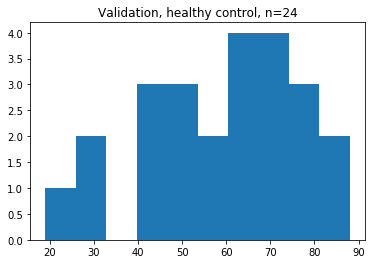

In [9]:
plt.hist(temp1['age at CT'])
plt.title('Validation, healthy control, n=24')

Text(0.5, 1.0, 'Training, healthy control, n=96')

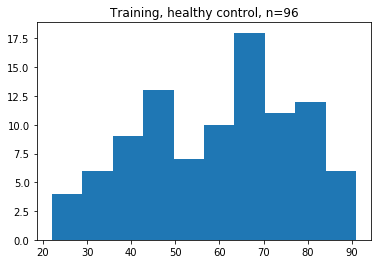

In [10]:
plt.hist(temp2['age at CT'])
plt.title('Training, healthy control, n=96')

In [12]:
print('Training set: ')
print(list(temp2.index),)

print('\nValidation set: ')
print(list(temp1.index),)

Training set: 
[1001, 1002, 1003, 1006, 1007, 1008, 1009, 1011, 1012, 1013, 1015, 1016, 1017, 1019, 1020, 1023, 1025, 1027, 1029, 1030, 1031, 1034, 1035, 1037, 1047, 1049, 1053, 1054, 1057, 1060, 1064, 1065, 1066, 1068, 1072, 1073, 1074, 1075, 1076, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1088, 1089, 1090, 1091, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1102, 1103, 1105, 1106, 1109, 1115, 1117, 1118, 1120, 1121, 1107, 1122, 1123, 1108, 1124, 1125, 1110, 1126, 1111, 1127, 1112, 1113, 1129, 1114, 1130, 1092, 1131, 1077, 1132, 1042, 1134, 1048, 1136, 1138, 1139, 1141, 1142]

Validation set: 
[1004, 1005, 1010, 1014, 1022, 1024, 1033, 1039, 1041, 1044, 1056, 1069, 1070, 1085, 1087, 1104, 1116, 1119, 1128, 1133, 1043, 1135, 1137, 1140]


In [13]:
print(datetime.datetime.now())

2022-08-01 13:11:03.299003
